# Importing all nessary files

In [1]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
# from tkinter import Tk


### Reading csv file

In [2]:
filepath = "E:\ECS-171-Project\Life Expectancy Data.csv"
data = pd.read_csv(filepath)

In [3]:
# Size of the data set
print(f'Shape of the data set: {data.shape}')

Shape of the data set: (2938, 22)


## EDA

In [4]:
print(f'Columns in the data set: \n\n{data.columns}')

Columns in the data set: 

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')


In [5]:
data.shape

(2938, 22)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [7]:
# Remove any leading or trailing spaces in the column names
data.columns = data.columns.str.strip()
# Define specific columns to keep capitalized
specific_columns = ['GDP', 'HIV/AIDS', 'BMI']

# Capitalize the first letter of each feature name and keep specific columns capitalized
data.columns = [col if col in specific_columns else col.title() for col in data.columns]

# Display the updated feature names
data.columns.tolist()

['Country',
 'Year',
 'Status',
 'Life Expectancy',
 'Adult Mortality',
 'Infant Deaths',
 'Alcohol',
 'Percentage Expenditure',
 'Hepatitis B',
 'Measles',
 'BMI',
 'Under-Five Deaths',
 'Polio',
 'Total Expenditure',
 'Diphtheria',
 'HIV/AIDS',
 'GDP',
 'Population',
 'Thinness  1-19 Years',
 'Thinness 5-9 Years',
 'Income Composition Of Resources',
 'Schooling']

In [8]:
# Identify percentage of null values in each column.
data.isnull().sum()*100/data.isnull().count()

Country                             0.000000
Year                                0.000000
Status                              0.000000
Life Expectancy                     0.340368
Adult Mortality                     0.340368
Infant Deaths                       0.000000
Alcohol                             6.603131
Percentage Expenditure              0.000000
Hepatitis B                        18.822328
Measles                             0.000000
BMI                                 1.157250
Under-Five Deaths                   0.000000
Polio                               0.646698
Total Expenditure                   7.692308
Diphtheria                          0.646698
HIV/AIDS                            0.000000
GDP                                15.248468
Population                         22.191967
Thinness  1-19 Years                1.157250
Thinness 5-9 Years                  1.157250
Income Composition Of Resources     5.684139
Schooling                           5.547992
dtype: flo

In [9]:
# Select columns
selected_cols = [
 'Life Expectancy',
 'Adult Mortality',
 'Infant Deaths',
 'Alcohol',
 'Percentage Expenditure',
 'Hepatitis B',
 'Measles',
 'BMI',
 'Under-Five Deaths',
 'Polio',
 'Total Expenditure',
 'Diphtheria',
 'HIV/AIDS',
 'GDP',
 'Population',
 'Thinness  1-19 Years',
 'Thinness 5-9 Years',
 'Income Composition Of Resources',
 'Schooling']
selected_data = data[selected_cols]

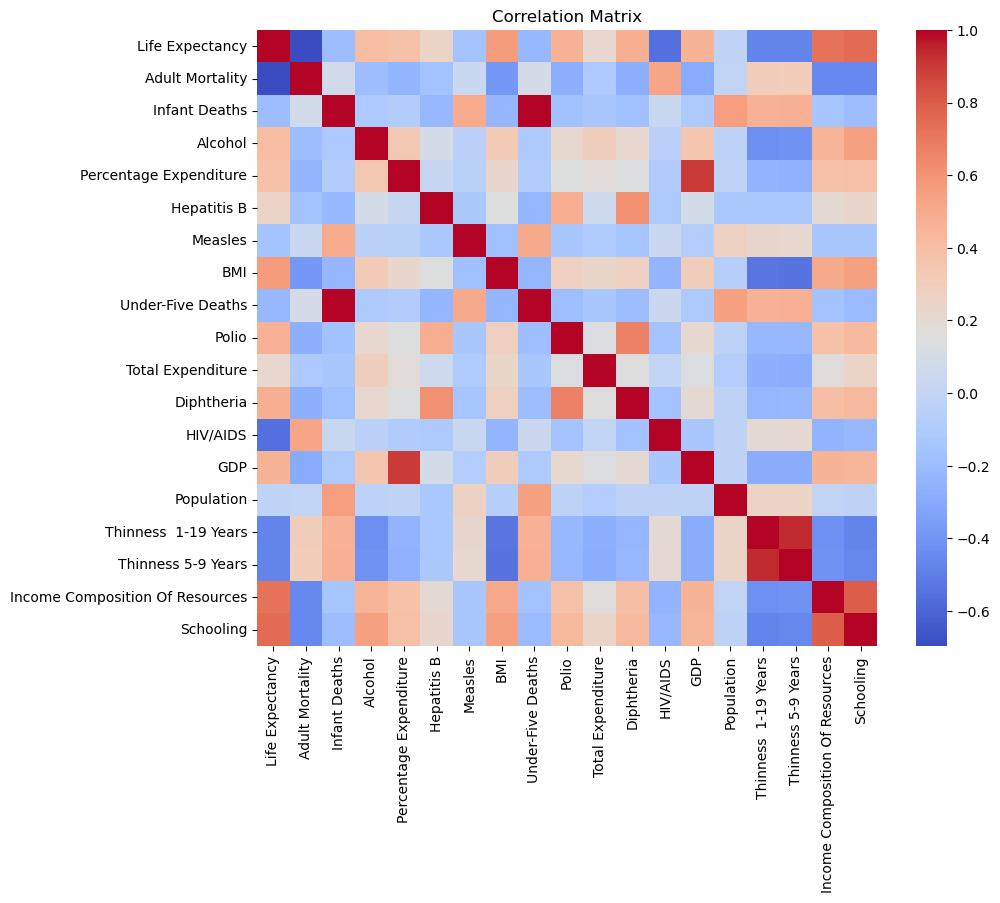

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a correlation matrix
correlation_matrix = selected_data.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [11]:
# Replace missing values with mean
numeric_data = data.select_dtypes(include=[np.number])
imputer = SimpleImputer(strategy='mean').set_output(transform='pandas')
numeric_data = imputer.fit_transform(numeric_data)
data.update(numeric_data)


In [12]:
# double check for missing values
data.isnull().sum()*100/data.isnull().count()

Country                            0.0
Year                               0.0
Status                             0.0
Life Expectancy                    0.0
Adult Mortality                    0.0
Infant Deaths                      0.0
Alcohol                            0.0
Percentage Expenditure             0.0
Hepatitis B                        0.0
Measles                            0.0
BMI                                0.0
Under-Five Deaths                  0.0
Polio                              0.0
Total Expenditure                  0.0
Diphtheria                         0.0
HIV/AIDS                           0.0
GDP                                0.0
Population                         0.0
Thinness  1-19 Years               0.0
Thinness 5-9 Years                 0.0
Income Composition Of Resources    0.0
Schooling                          0.0
dtype: float64

In [13]:
# Select columns
selected_cols = [
 'Life Expectancy',
 'Adult Mortality',
 'Infant Deaths',
 'Alcohol',
 'Percentage Expenditure',
 'Hepatitis B',
 'Measles',
 'BMI',
 'Under-Five Deaths',
 'Polio',
 'Total Expenditure',
 'Diphtheria',
 'HIV/AIDS',
 'GDP',
 'Population',
 'Thinness  1-19 Years',
 'Thinness 5-9 Years',
 'Income Composition Of Resources',
 'Schooling']
selected_data = data[selected_cols]

In [21]:
max_values = selected_data.max()
print(max_values)

Adult Mortality           26.888659
Alcohol                    4.227292
Hepatitis B                4.595120
Measles                   12.265205
BMI                        4.595120
Polio                      4.574711
Total Expenditure         17.600000
Diphtheria                 4.584967
HIV/AIDS                   3.923952
GDP                       11.688329
Thinness  1-19 Years       3.321432
Schooling                 20.700000
Infant Deaths           1800.000000
dtype: float64


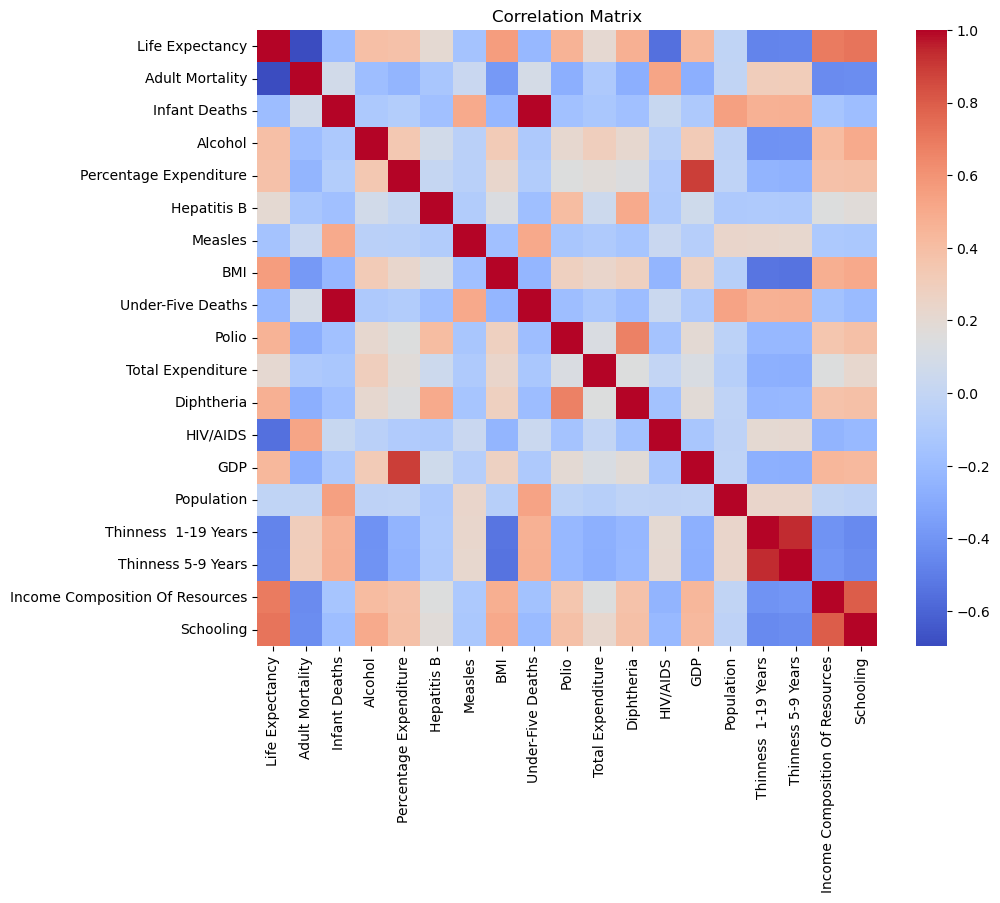

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a correlation matrix
correlation_matrix = selected_data.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


c:\Users\liang\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


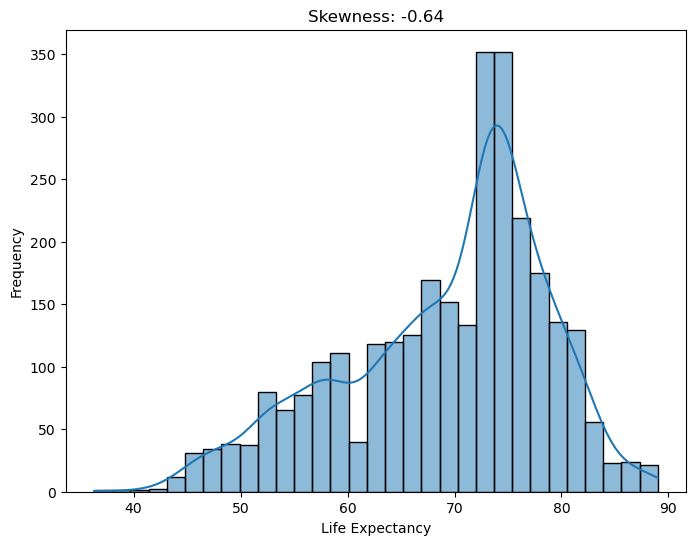

c:\Users\liang\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


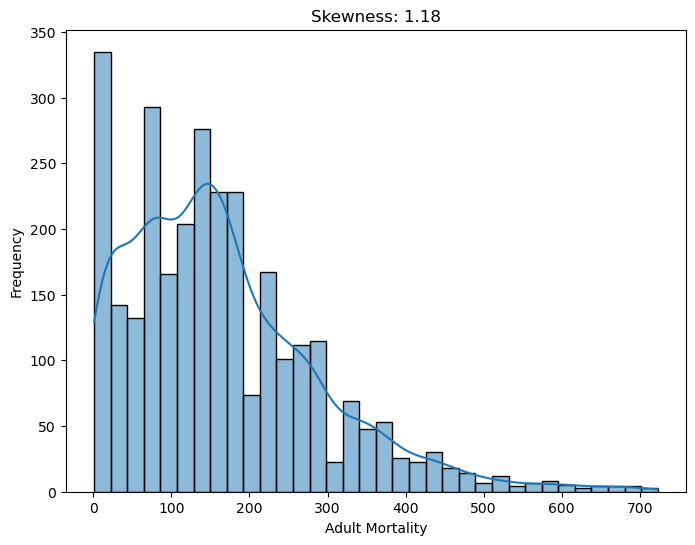

c:\Users\liang\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


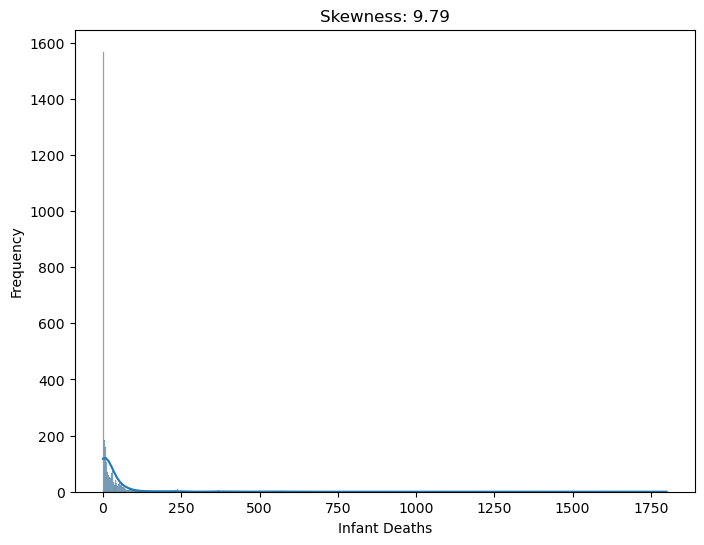

c:\Users\liang\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


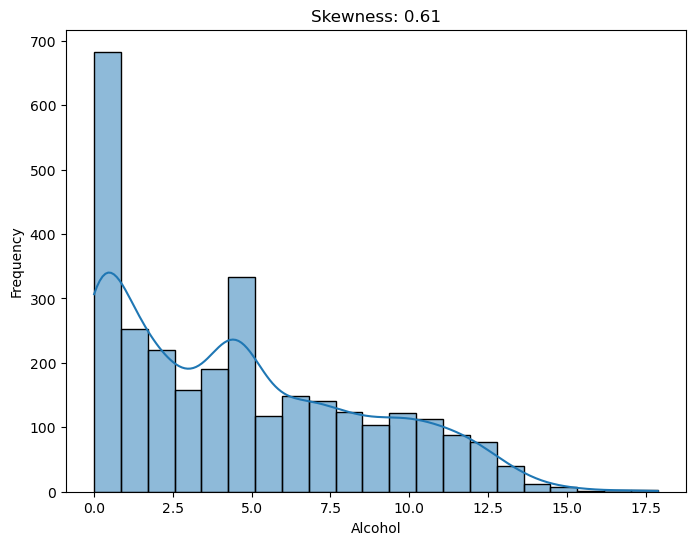

c:\Users\liang\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


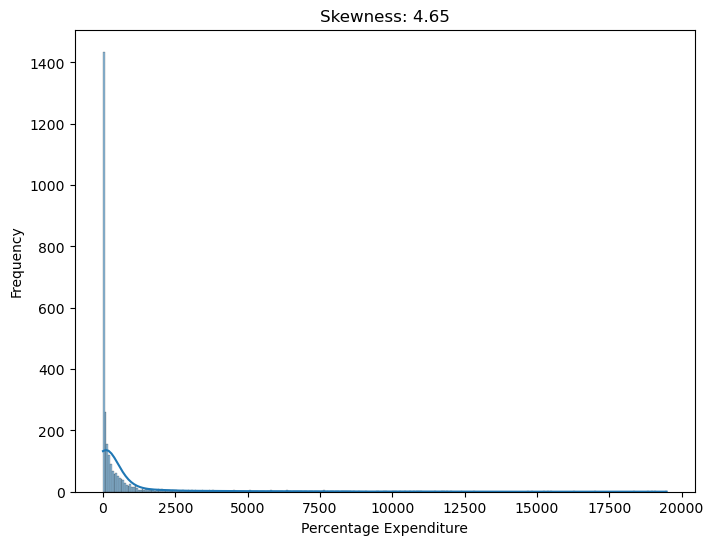

c:\Users\liang\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


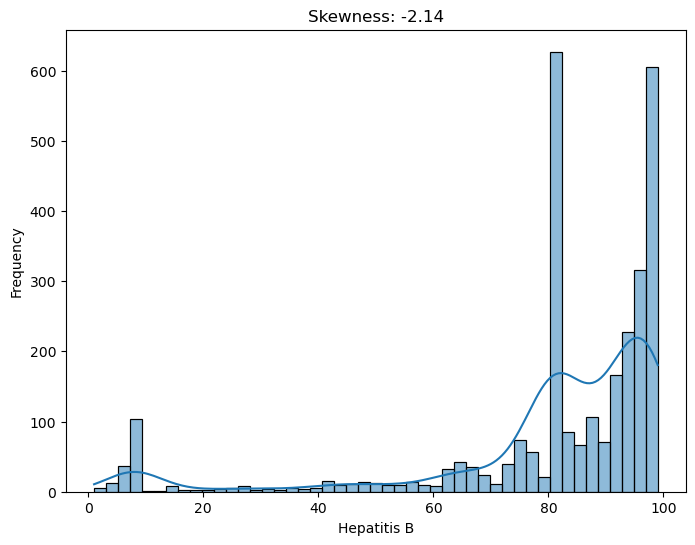

c:\Users\liang\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


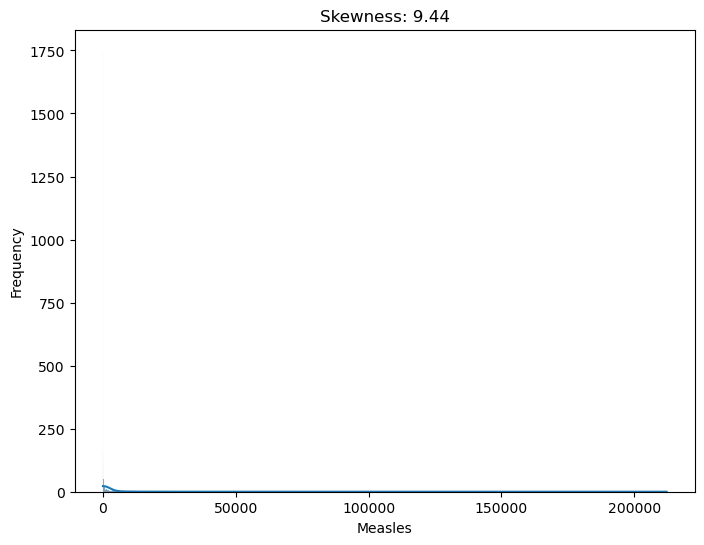

c:\Users\liang\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


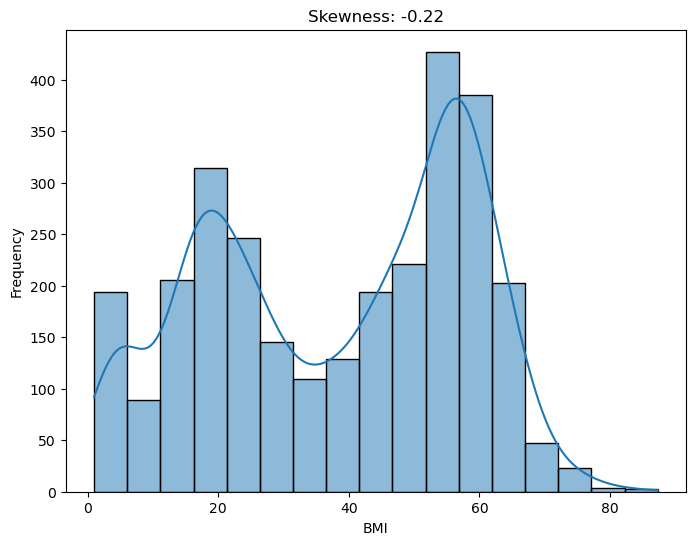

c:\Users\liang\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


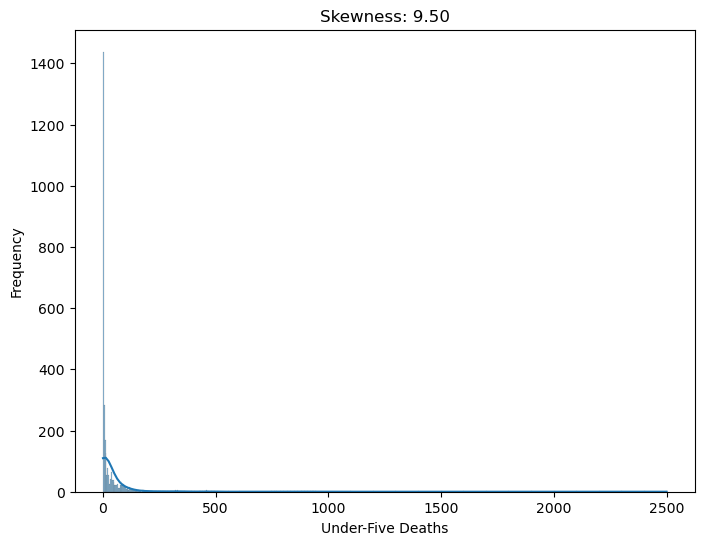

c:\Users\liang\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


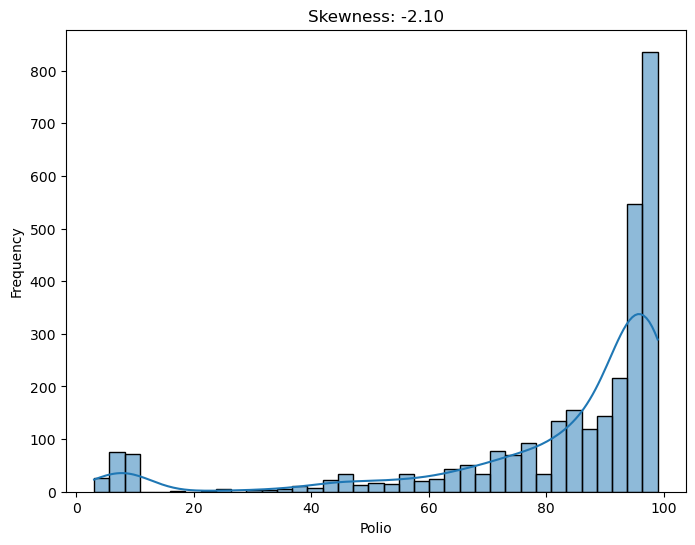

c:\Users\liang\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


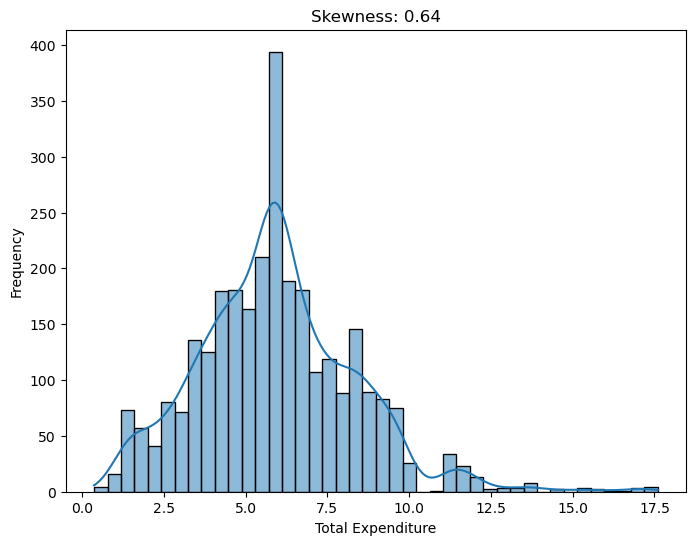

c:\Users\liang\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


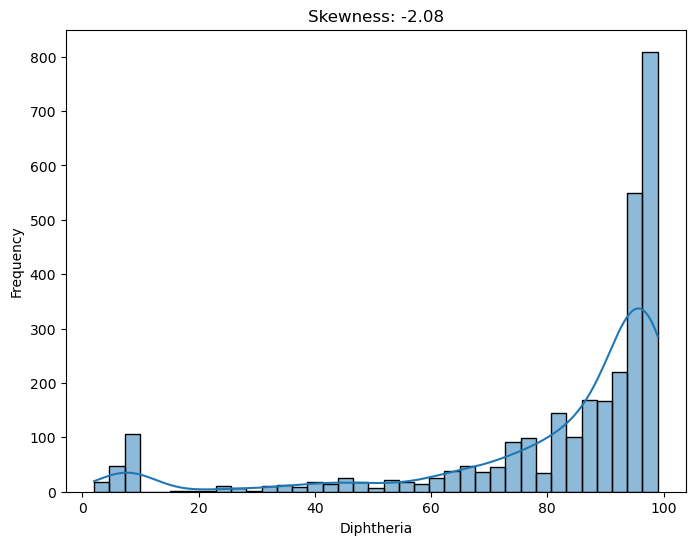

c:\Users\liang\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


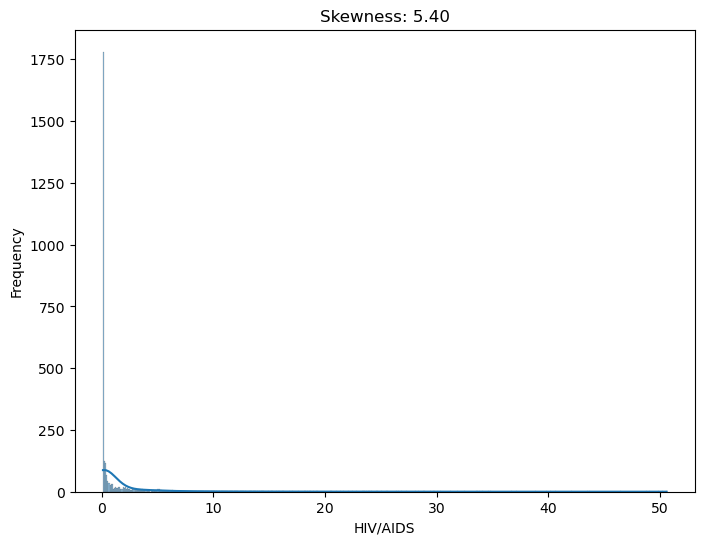

c:\Users\liang\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


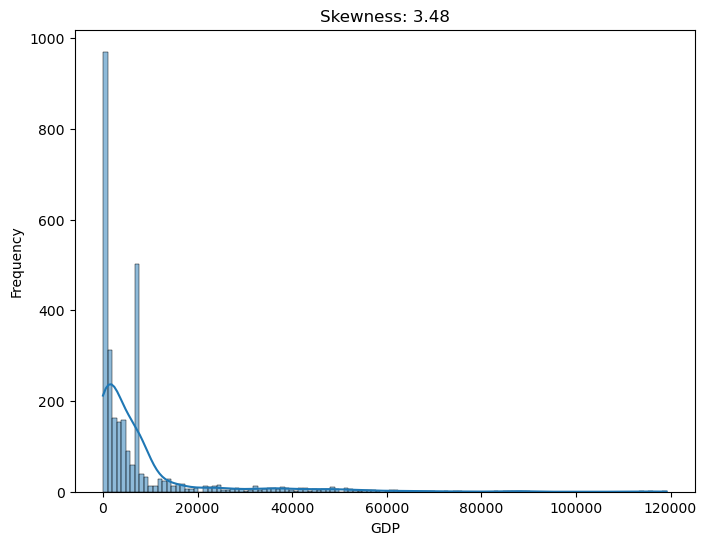

c:\Users\liang\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


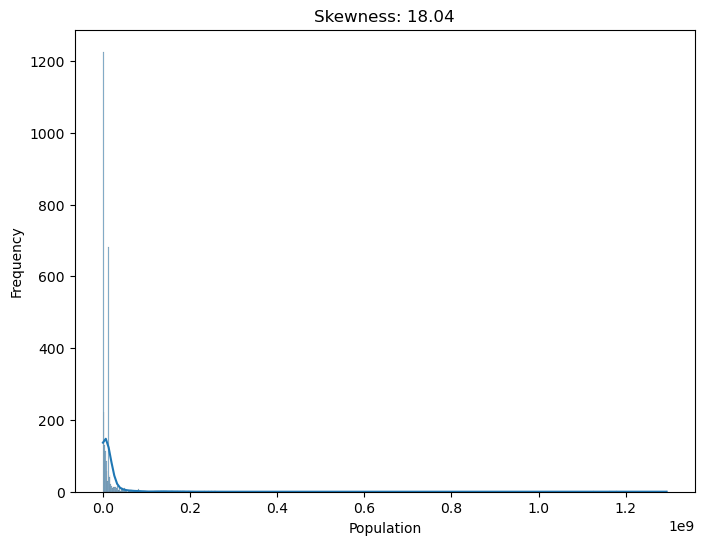

c:\Users\liang\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


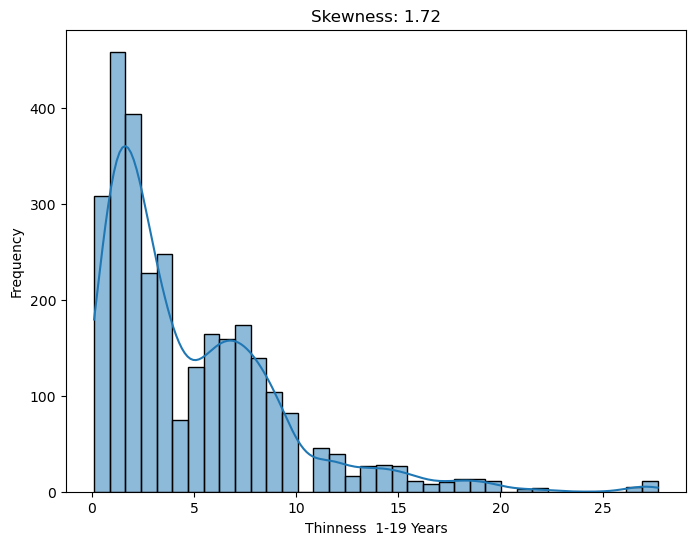

c:\Users\liang\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


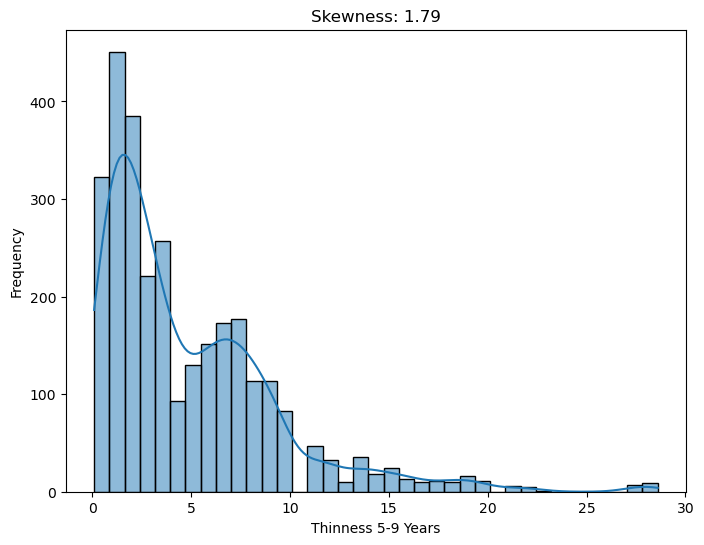

c:\Users\liang\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


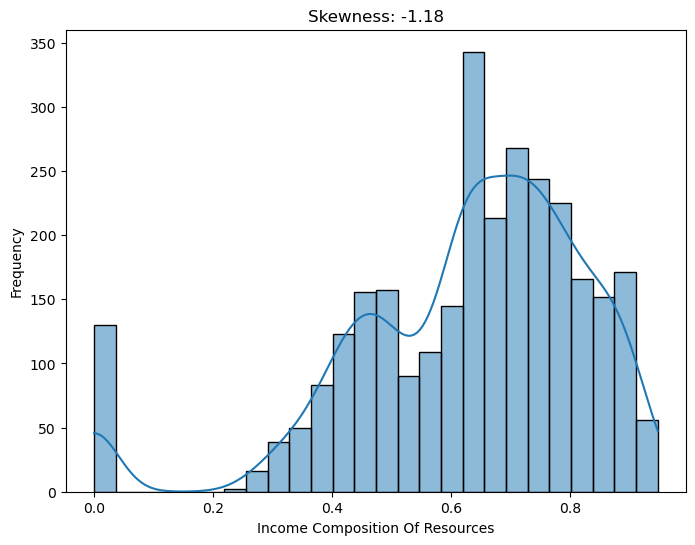

c:\Users\liang\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


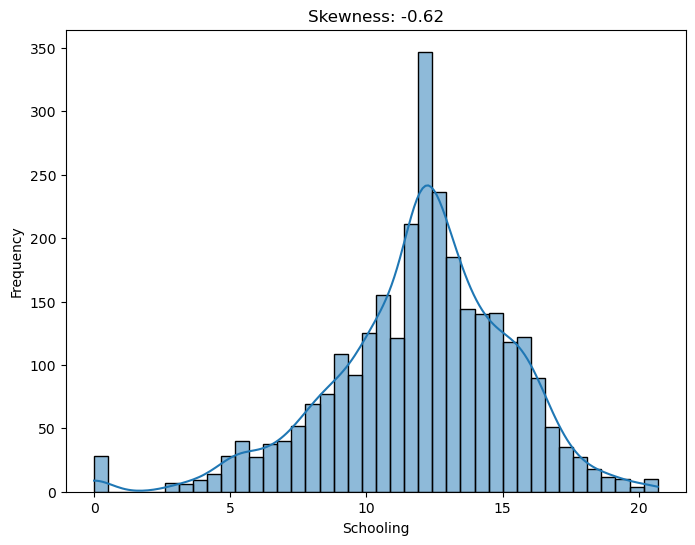

In [15]:
# Calculate skewness of each feature
skewness = selected_data.skew()

# Plot histogram for each feature
for feature in selected_data.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=selected_data, x=feature, kde=True)
    plt.title(f"Skewness: {skewness[feature]:.2f}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.show()

# Feature Engineering


In [16]:
alcohol = data.Alcohol
adult_mortality = data['Adult Mortality']
hep_b = data['Hepatitis B']
measles = data['Measles']
BMI = data['BMI']
polio = data.Polio
total_exp = data['Total Expenditure']
diph = data['Diphtheria']
AIDS = data['HIV/AIDS']
GDP = data.GDP
school = data.Schooling
thinn_1_9 = data['Thinness  1-19 Years']
infant_deaths = data['Infant Deaths']

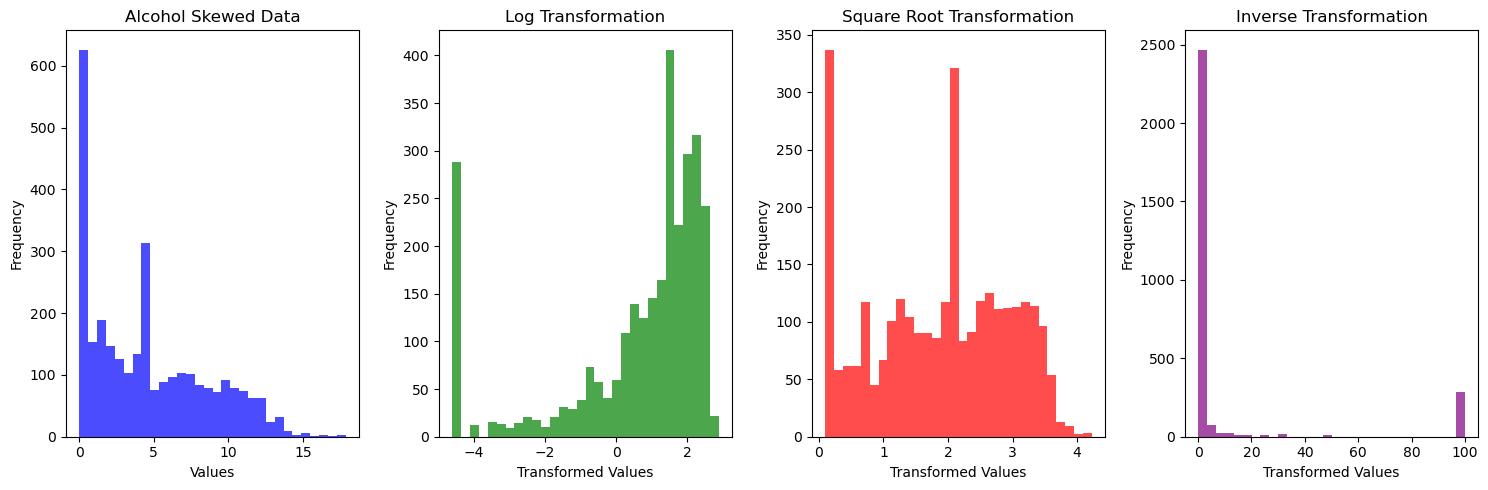

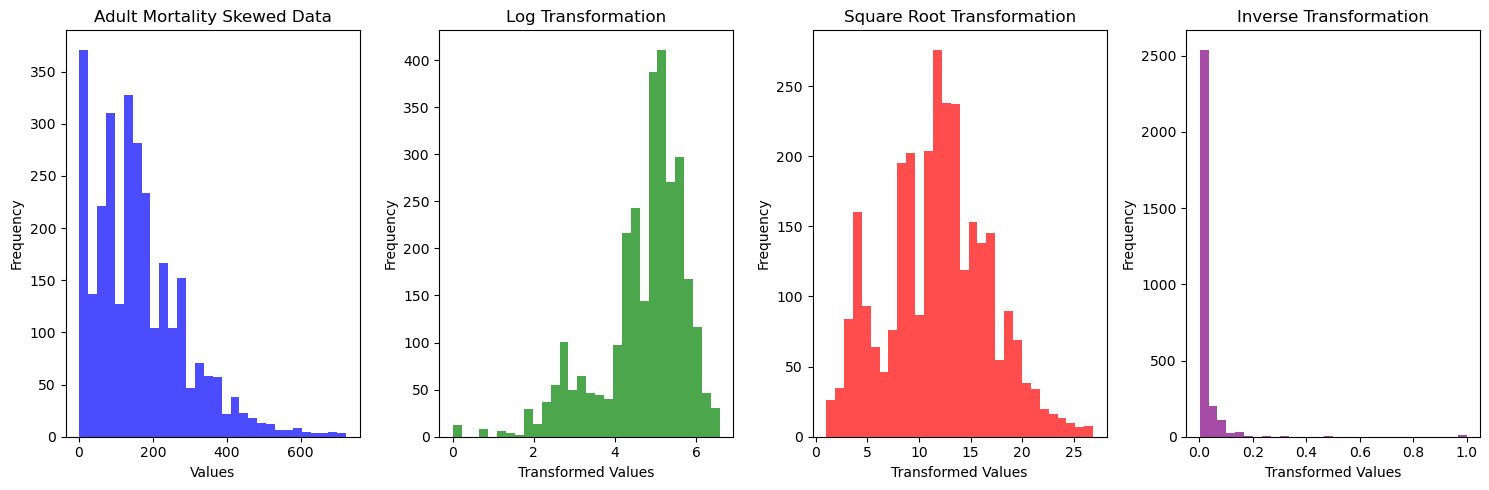

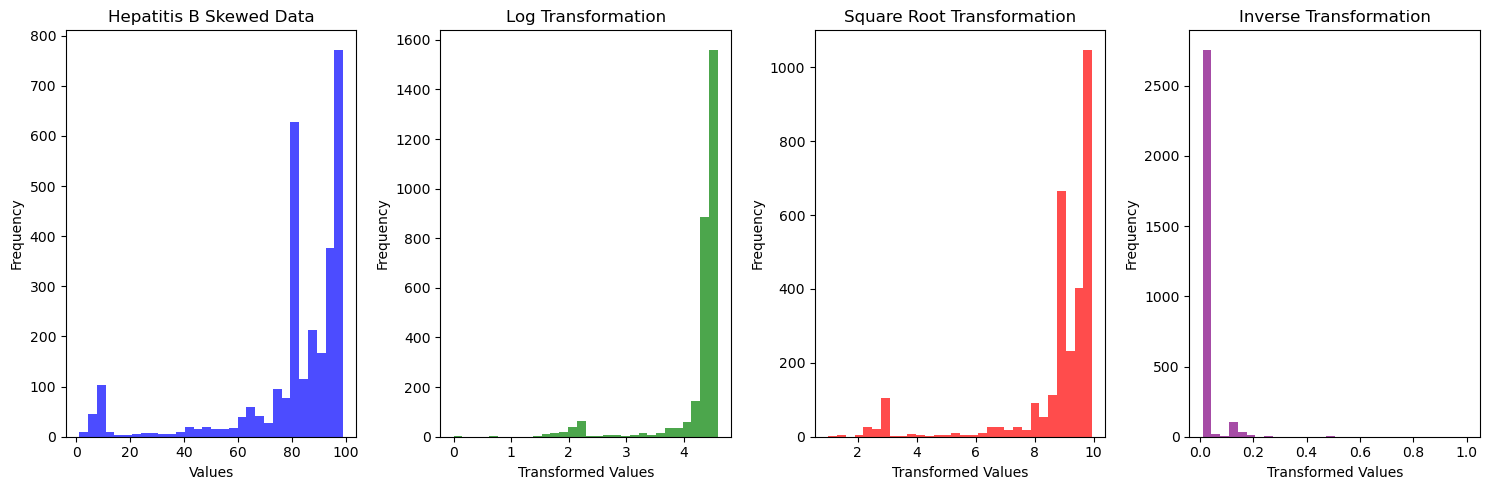

c:\Users\liang\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


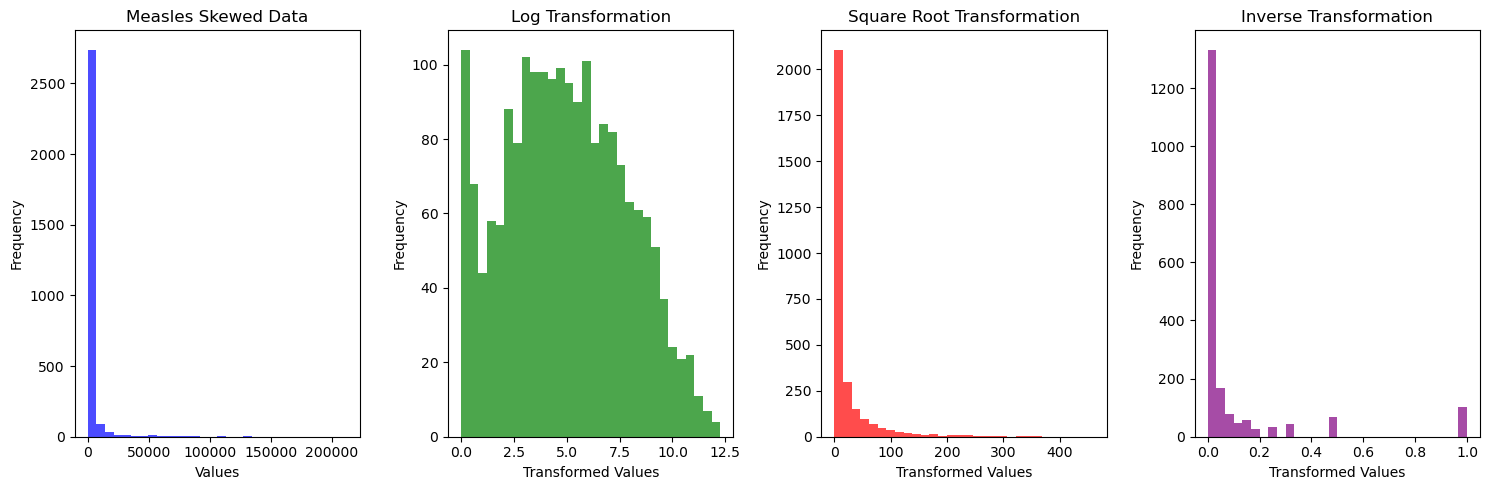

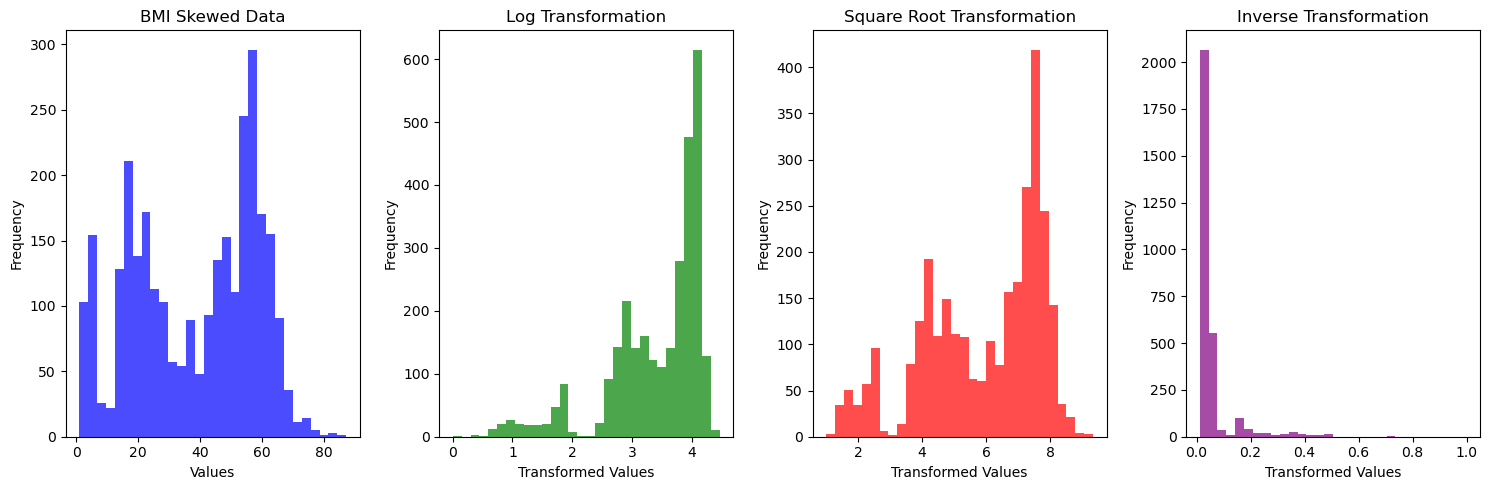

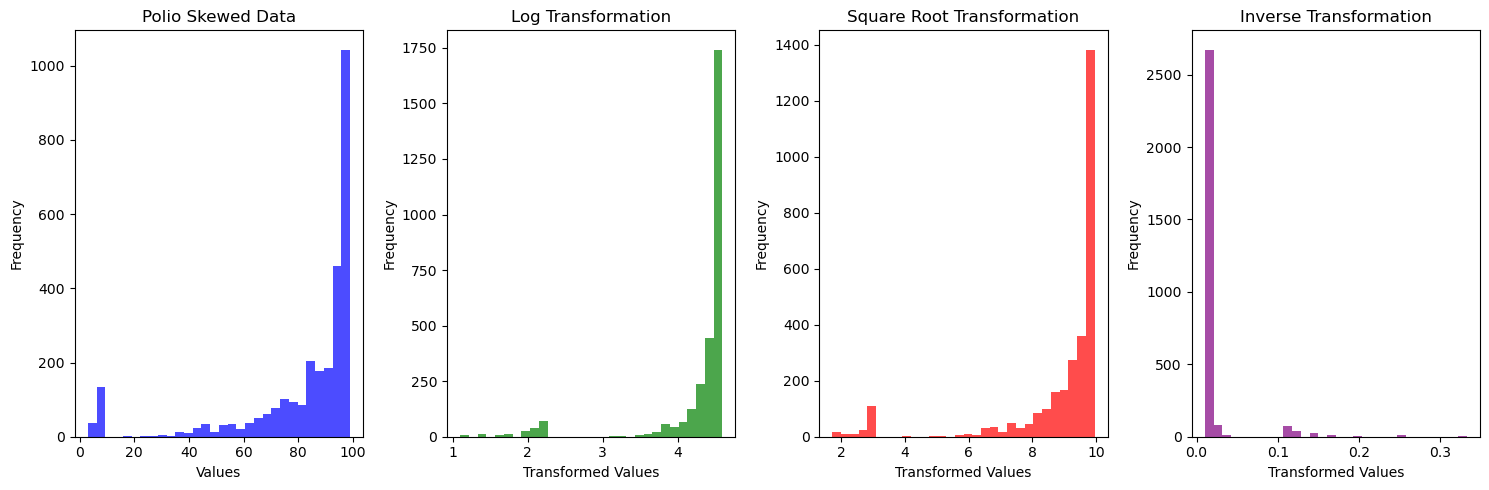

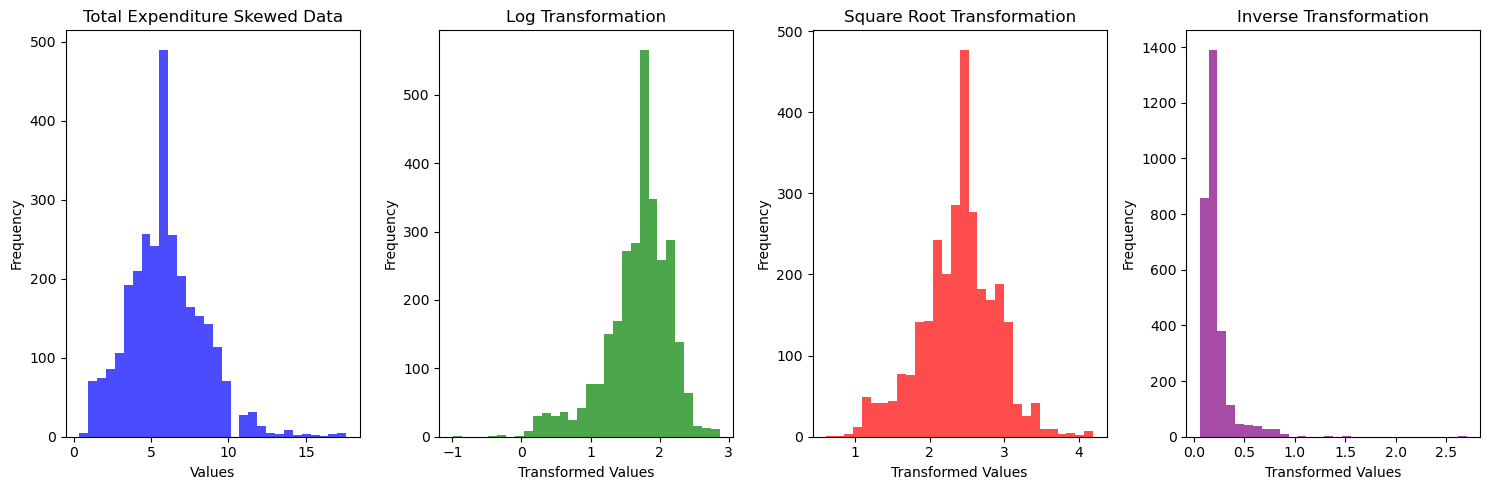

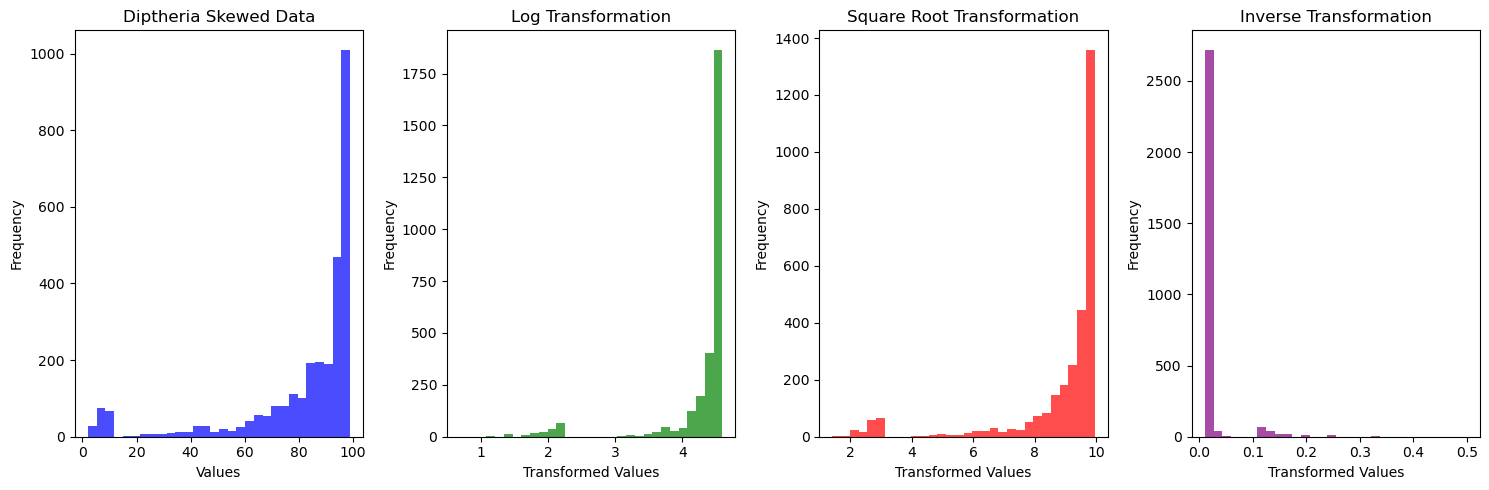

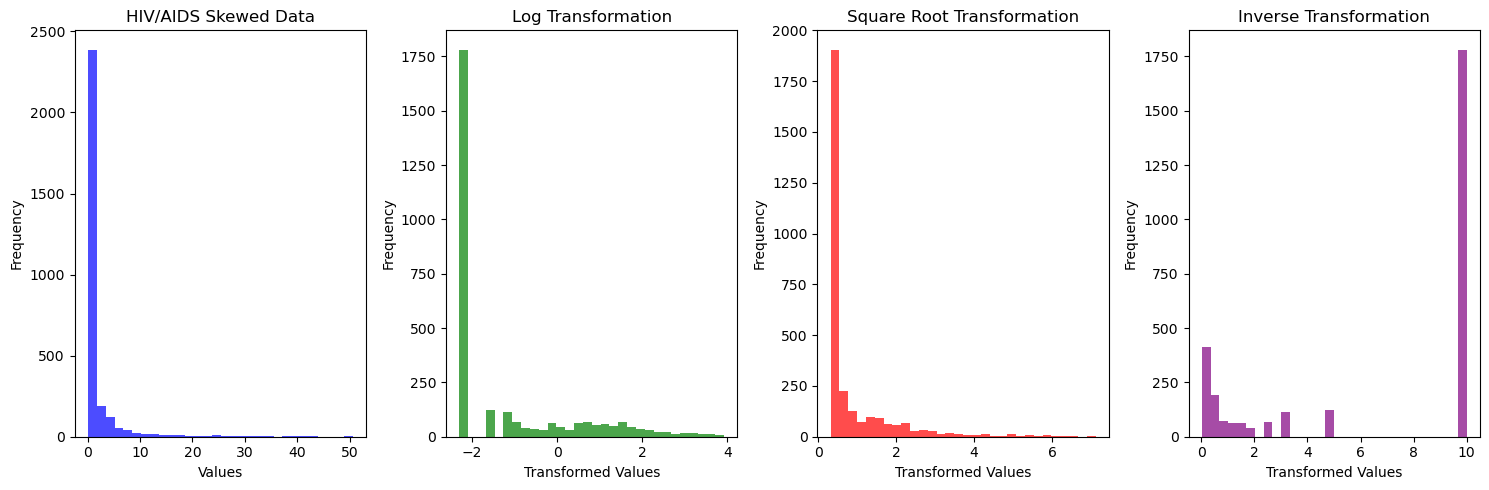

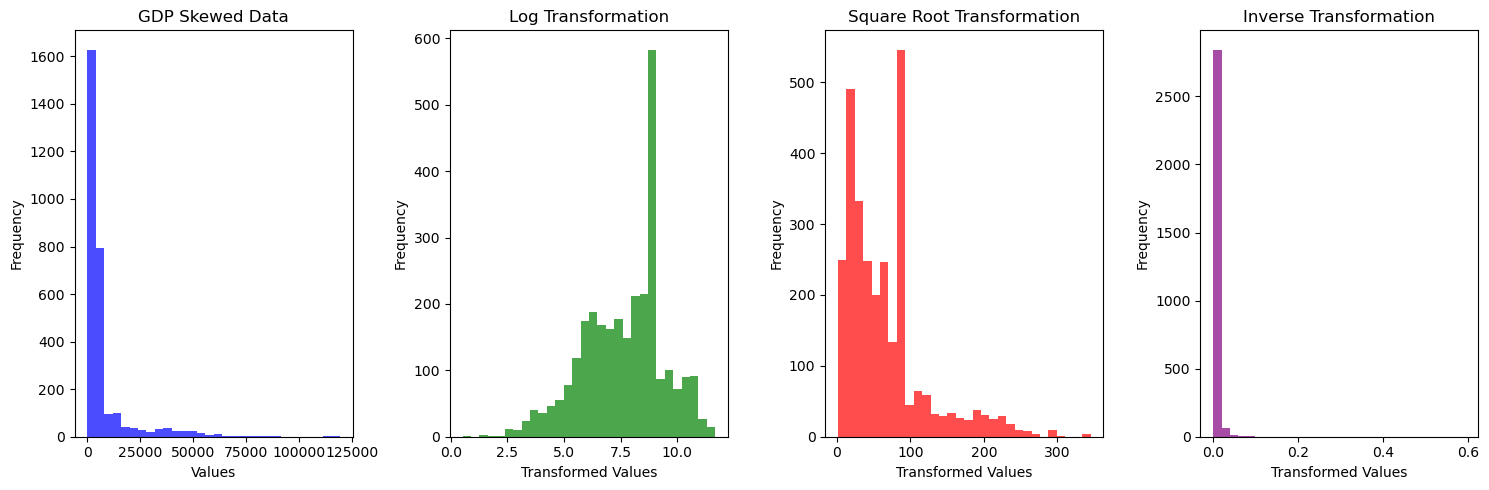

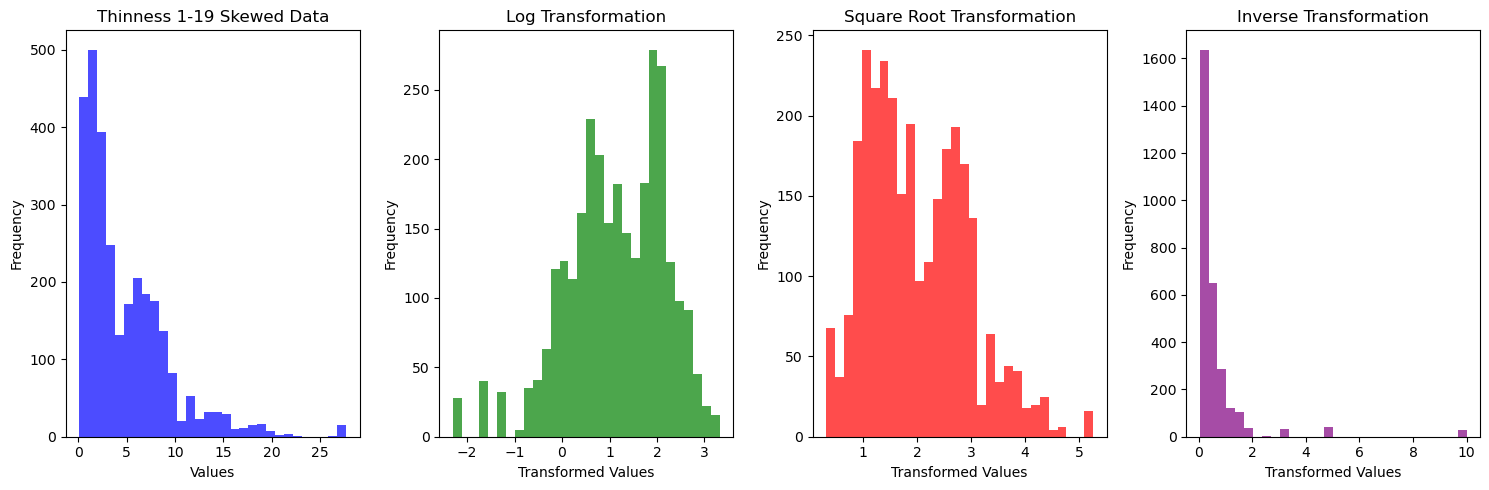

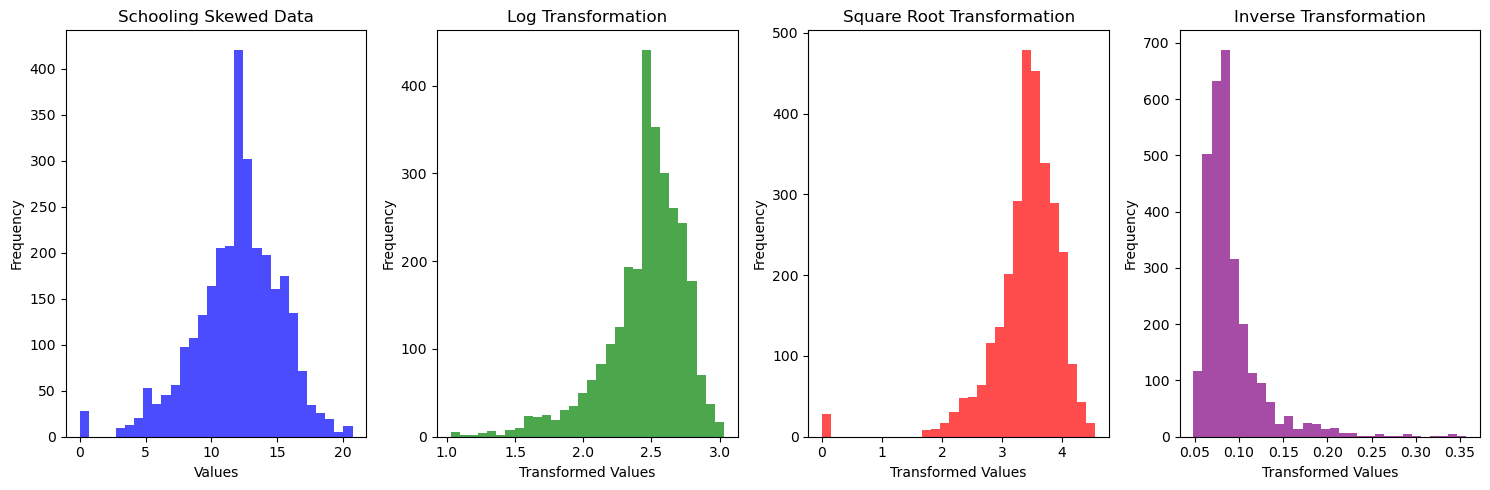

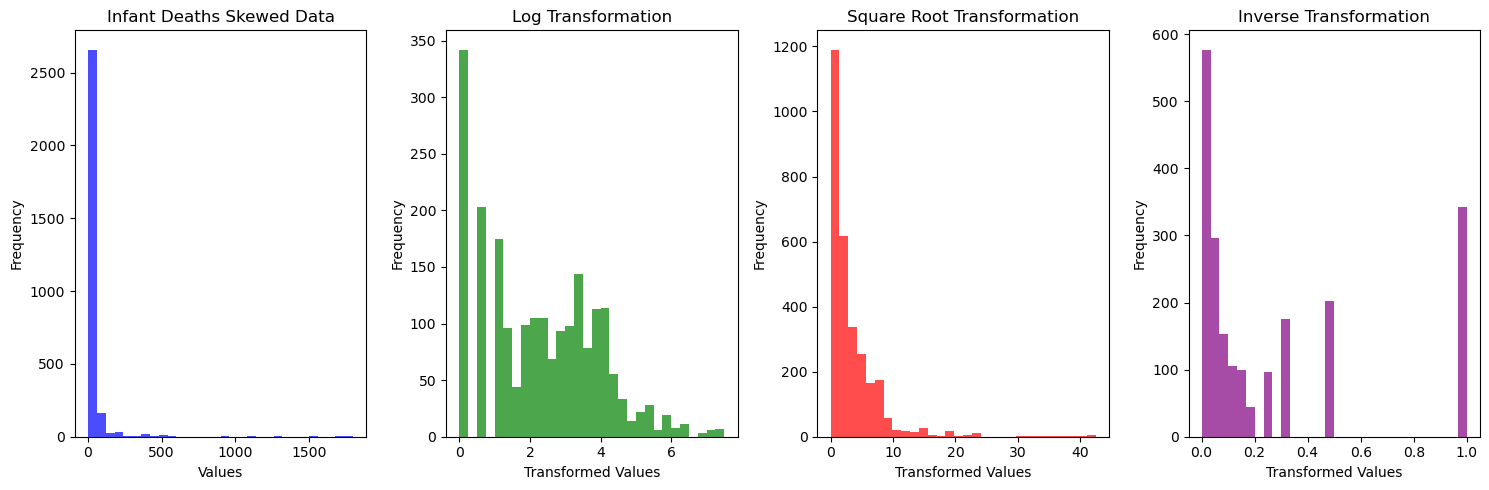

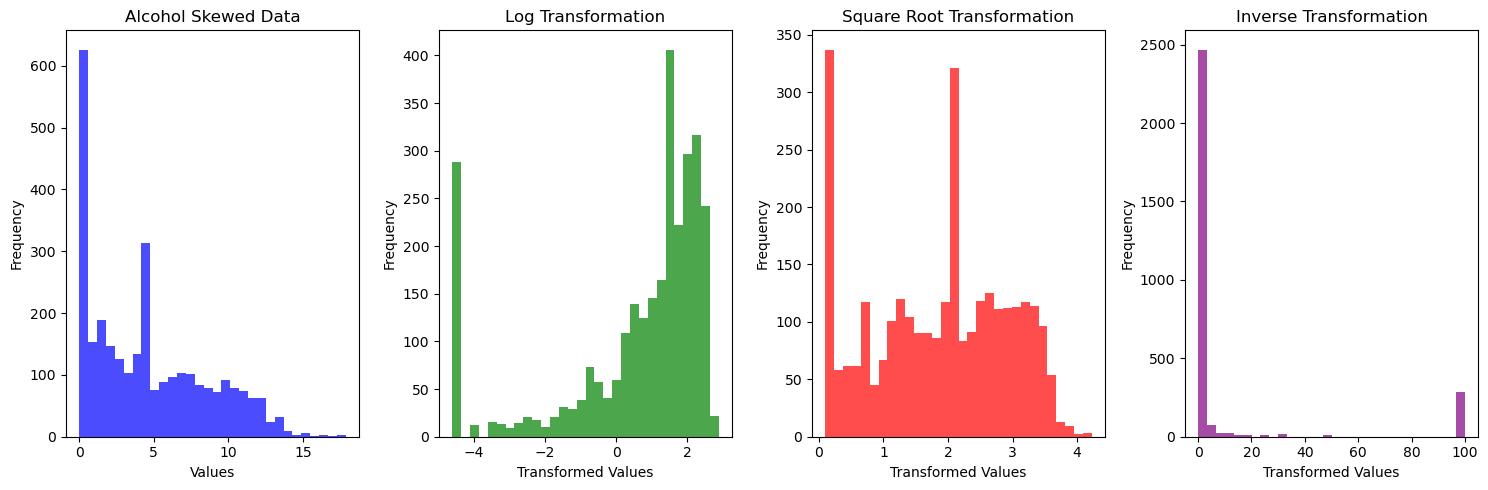

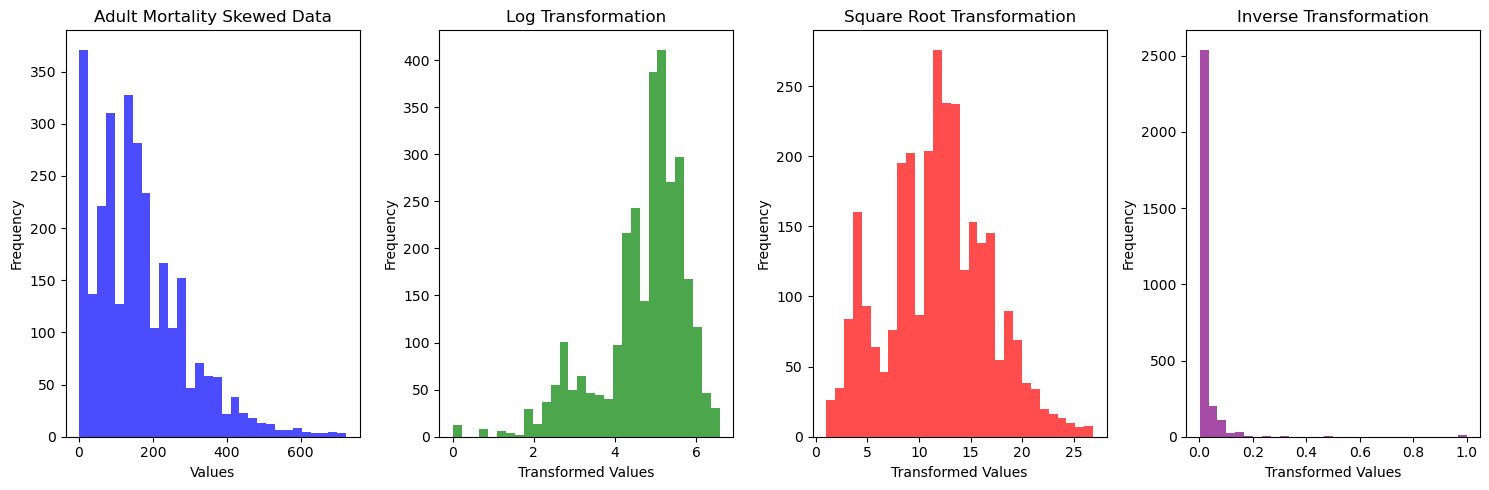

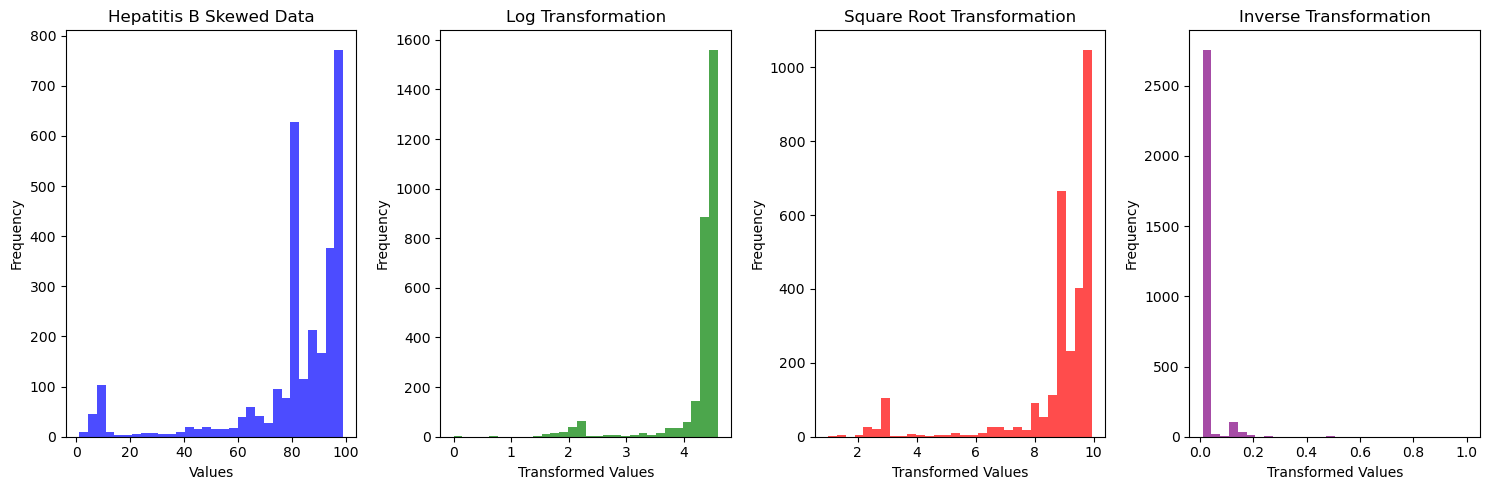

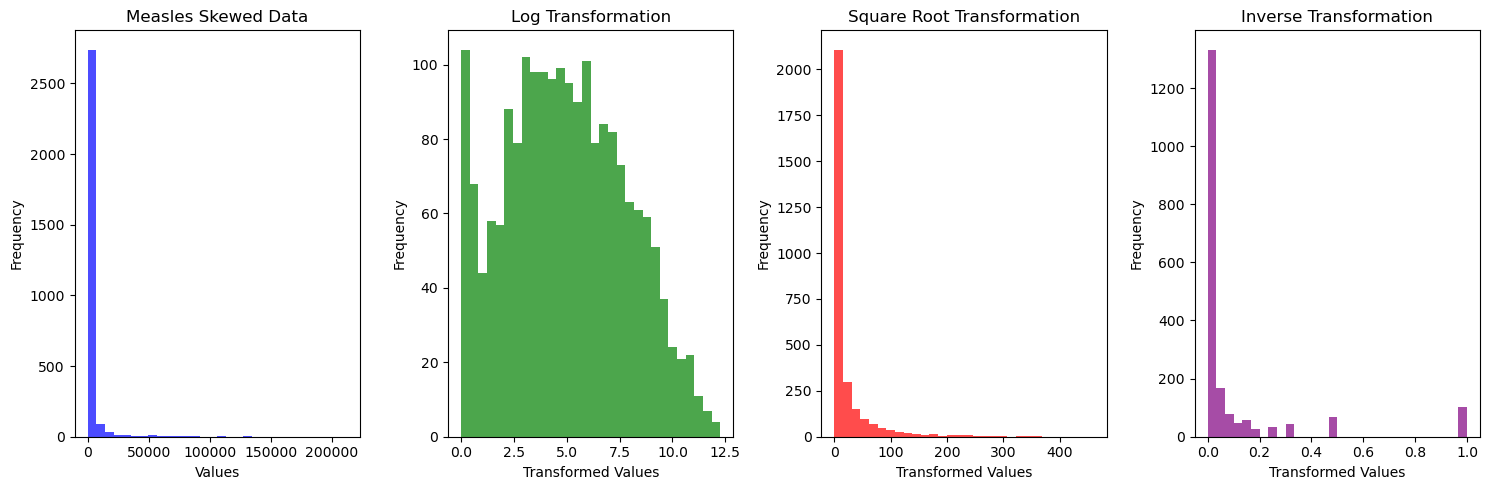

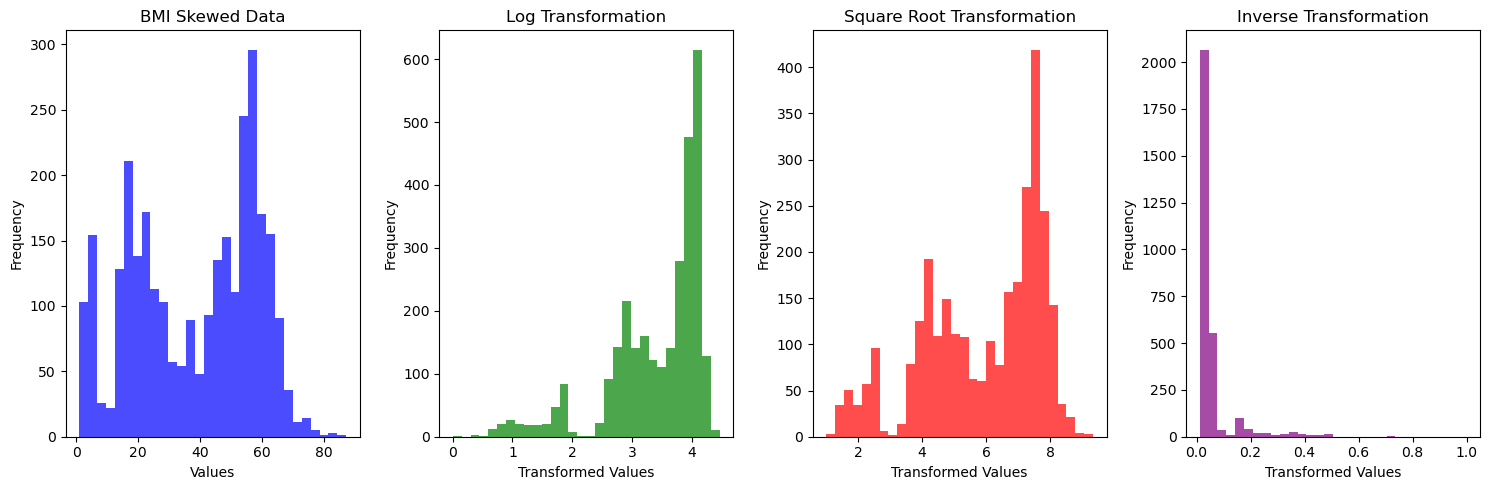

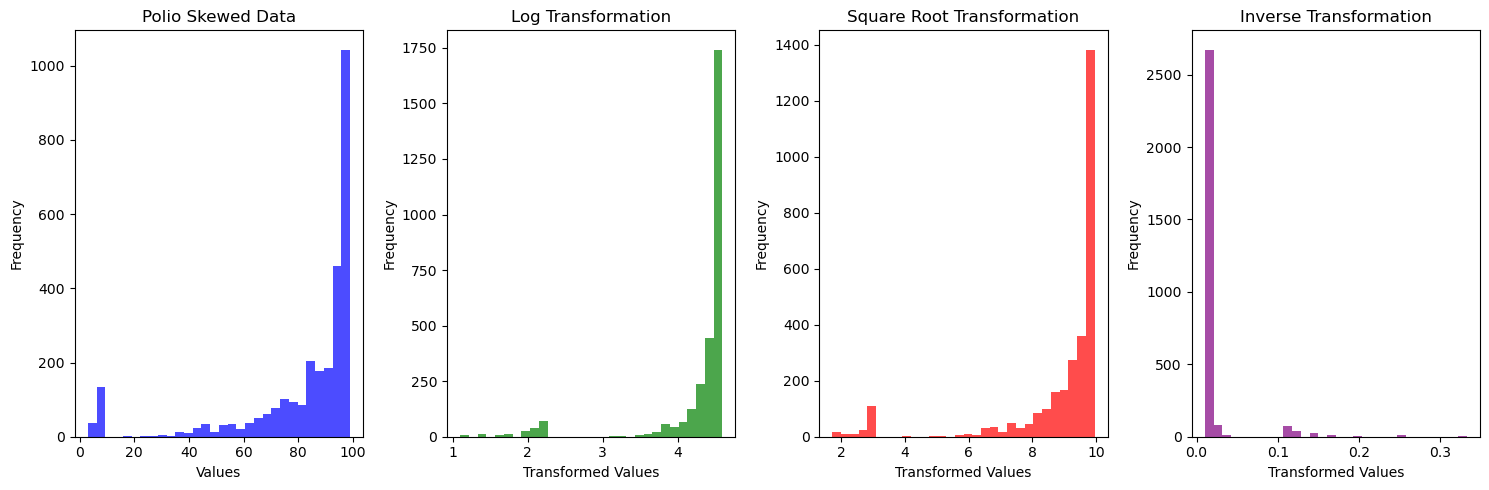

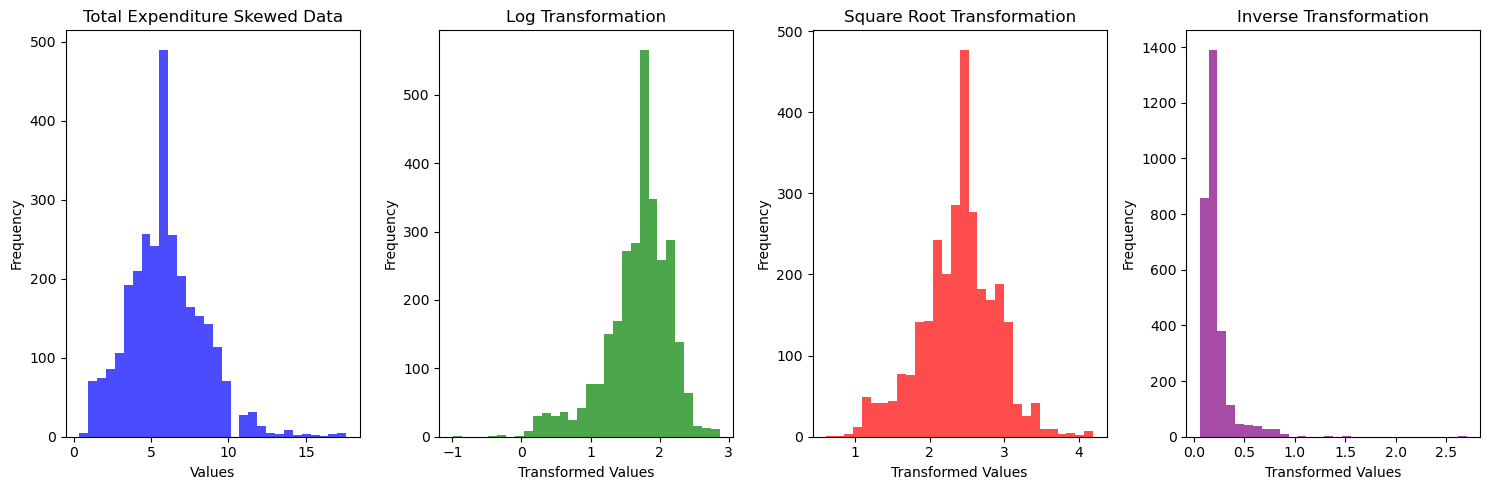

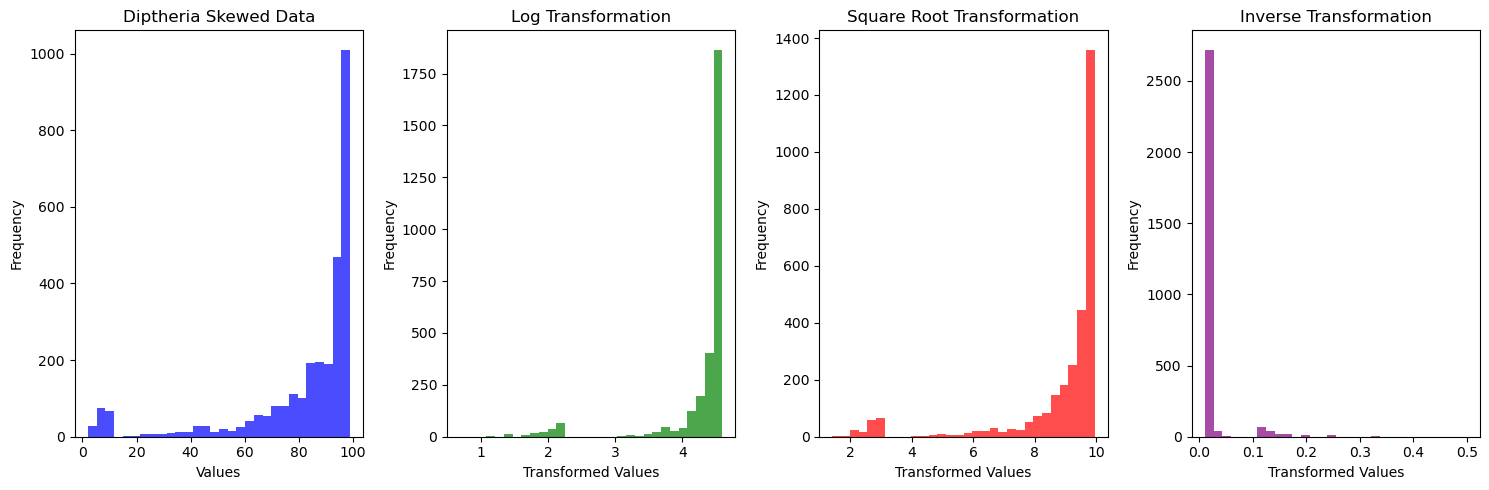

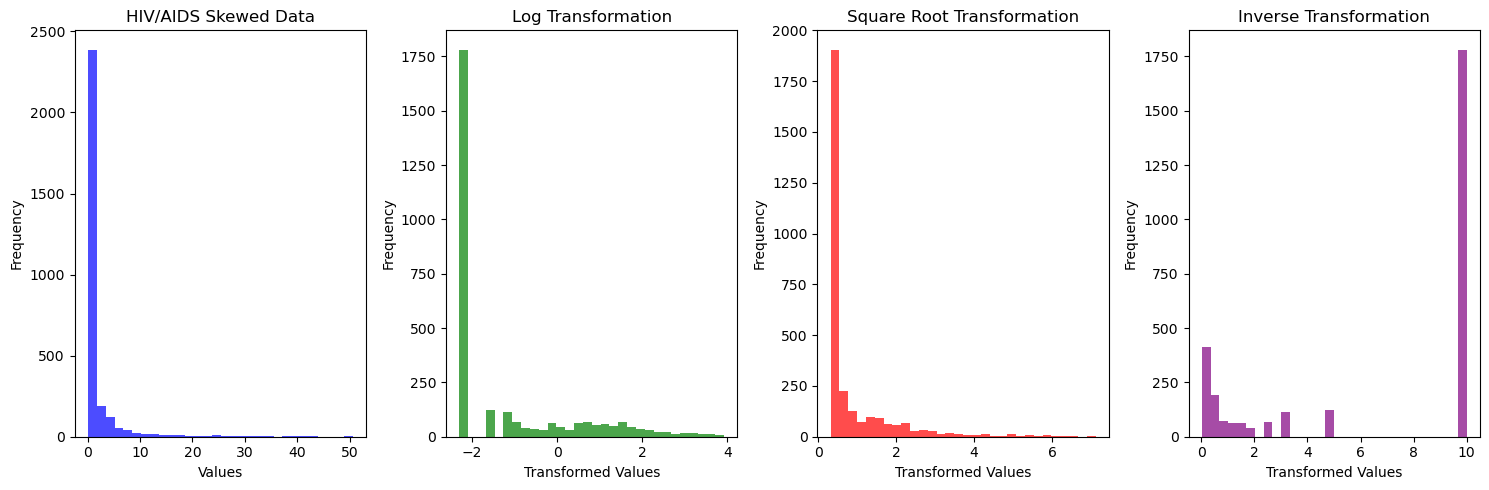

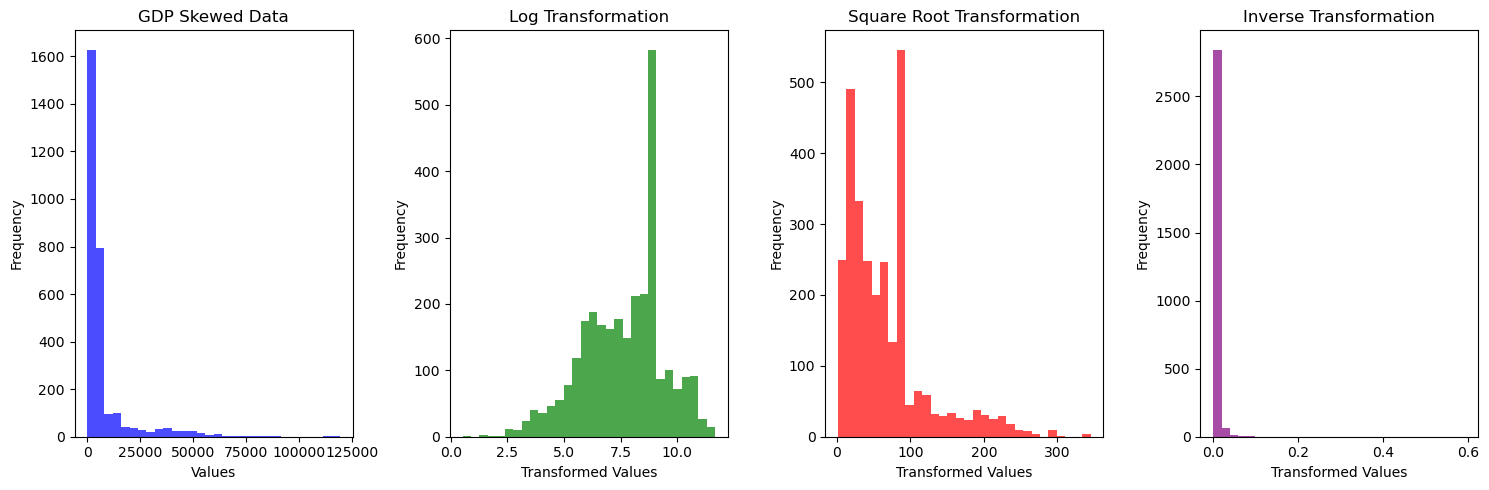

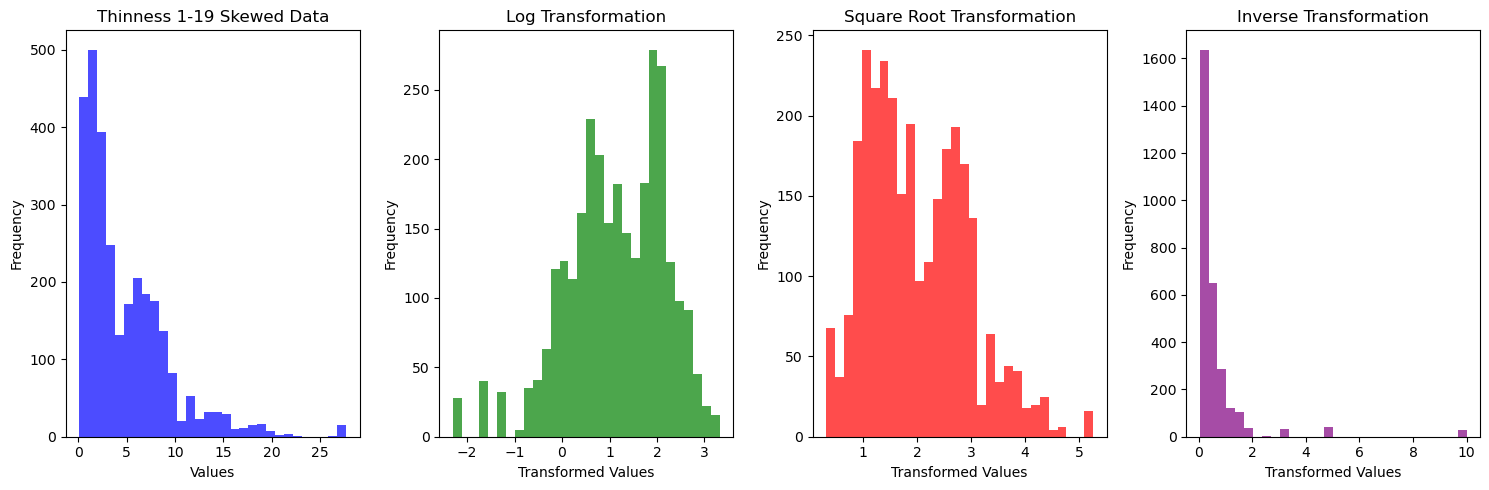

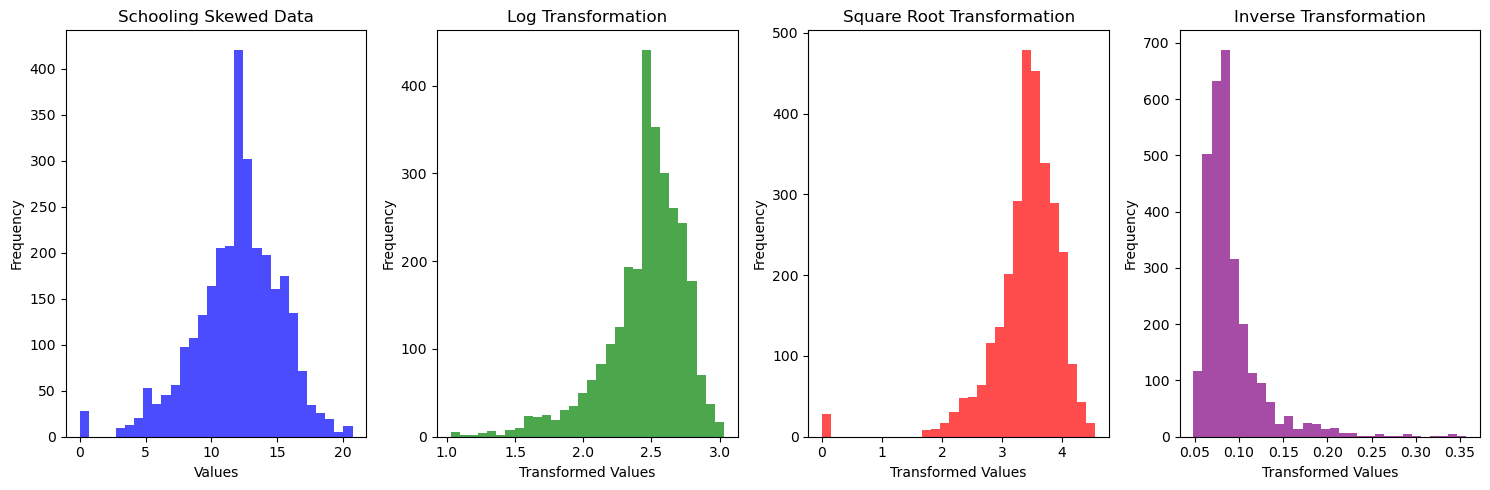

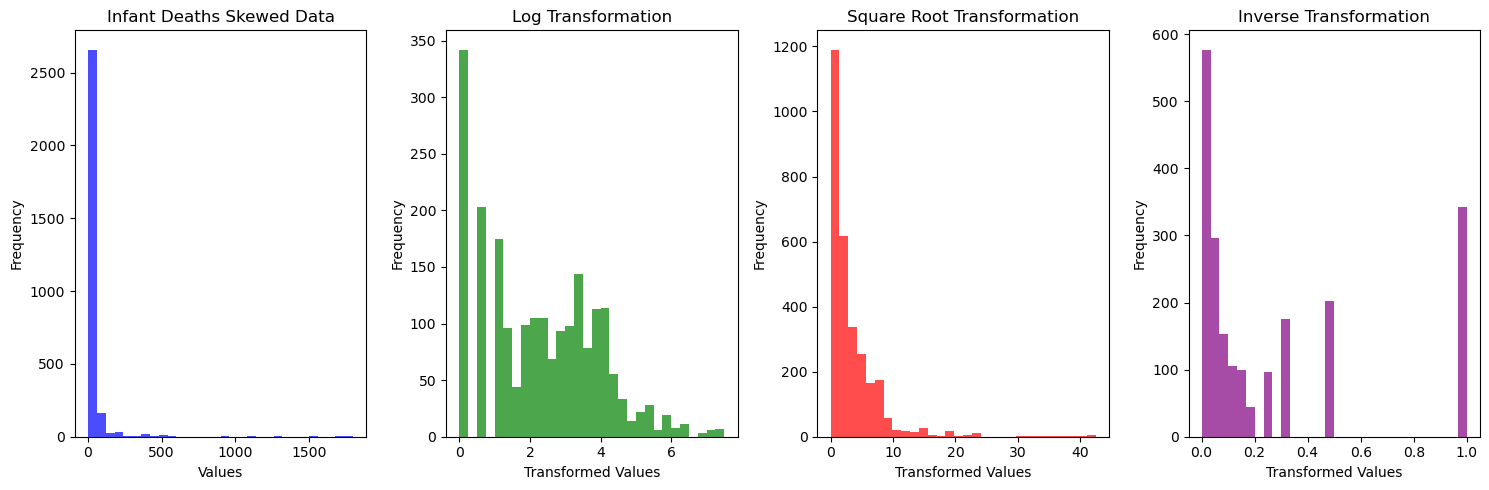

In [17]:
# Plot the histogram of skewed data

def plot_histograms(skewed_data, dataName):
    skewed_data = pd.to_numeric(skewed_data, errors='coerce')
    plt.figure(figsize=(15, 5))
    
    # Plot original skewed data
    plt.subplot(1, 4, 1)
    plt.hist(skewed_data, bins=30, color='blue', alpha=0.7)
    plt.title(dataName + ' Skewed Data')
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    
    # Apply transformations
    log_transformed = np.log(skewed_data)
    sqrt_transformed = np.sqrt(skewed_data)
    inverse_transformed = 1 / skewed_data

    # Filter out infinite and NaN values
    log_transformed_filtered = log_transformed[np.isfinite(log_transformed)]
    inverse_transformed_filtered = inverse_transformed[np.isfinite(inverse_transformed)]

    # Plot histogram for Log Transformation
    plt.subplot(1, 4, 2)
    plt.hist(log_transformed_filtered, bins=30, color='green', alpha=0.7)
    plt.title('Log Transformation')
    plt.xlabel('Transformed Values')
    plt.ylabel('Frequency')

    # Plot histogram for Square Root Transformation
    plt.subplot(1, 4, 3)
    plt.hist(sqrt_transformed, bins=30, color='red', alpha=0.7)
    plt.title('Square Root Transformation')
    plt.xlabel('Transformed Values')
    plt.ylabel('Frequency')

    # Plot histogram for Inverse Transformation
    plt.subplot(1, 4, 4)
    plt.hist(inverse_transformed_filtered, bins=30, color='purple', alpha=0.7)
    plt.title('Inverse Transformation')
    plt.xlabel('Transformed Values')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

plot_histograms(alcohol, "Alcohol")
plot_histograms(adult_mortality, "Adult Mortality")
plot_histograms(hep_b, "Hepatitis B")
plot_histograms(measles, "Measles")
plot_histograms(BMI, "BMI")
plot_histograms(polio, "Polio")
plot_histograms(total_exp, "Total Expenditure")
plot_histograms(diph, "Diptheria")
plot_histograms(AIDS, "HIV/AIDS")
plot_histograms(GDP, "GDP")
plot_histograms(thinn_1_9, "Thinness 1-19")
plot_histograms(school, "Schooling")
plot_histograms(infant_deaths, "Infant Deaths")


plot_histograms(alcohol, "Alcohol")
plot_histograms(adult_mortality, "Adult Mortality")
plot_histograms(hep_b, "Hepatitis B")
plot_histograms(measles, "Measles")
plot_histograms(BMI, "BMI")
plot_histograms(polio, "Polio")
plot_histograms(total_exp, "Total Expenditure")
plot_histograms(diph, "Diptheria")
plot_histograms(AIDS, "HIV/AIDS")
plot_histograms(GDP, "GDP")
plot_histograms(thinn_1_9, "Thinness 1-19")
plot_histograms(school, "Schooling")
plot_histograms(infant_deaths, "Infant Deaths")


In order to properly distribute our data, we tried three different transformation methods: log transformation, square root transformation, and inverse transform. The different transformations worked for the different variables in getting an even distribution. For most of the variables, we were able to transform them to achieve a much more even distribution. However, for variables such as HIV/AIDS and Infant deaths, we were not able to find a transformation that can achieve an even distribution. This is because most of the countries has an infant death and HIV case very close to 0 while a few countries have a very high amount. This lead to those 2 variables being heavily skewed towards the right. However, because these variables are highly correlated to life expectancy, we will still use them.

In [18]:
# Select columns
selected_cols = ["Alcohol", "Adult Mortality", "Hepatitis B", "Measles", "BMI",
                 "Polio", "Total Expenditure", "Diphtheria", "HIV/AIDS", "GDP",
                 "Thinness  1-19 Years", "Schooling", "Infant Deaths"]
selected_data = data[selected_cols]
target = data["Life Expectancy"]

In [19]:
# Transform selected columns
selected_data = selected_data.apply({"Adult Mortality": np.sqrt,
                                     "Alcohol": np.sqrt,
                                     "Hepatitis B": lambda x: np.log(100 - x),
                                     "Measles": lambda x: np.log(x + 0.1),
                                     "BMI": lambda x: np.log(100 - x),
                                     "Polio": lambda x: np.log(100 - x),
                                     "Total Expenditure": lambda x: x,
                                     "Diphtheria": lambda x: np.log(100 - x),
                                     "HIV/AIDS": np.log,
                                     "GDP": np.log,
                                     "Thinness  1-19 Years": np.log,
                                     "Schooling": lambda x: x,
                                     "Infant Deaths": lambda x: x})

We first cleaned the data by removing all outliers according to the procedure we discussed previously, with any data points falling below the Lower Quartile - 1.5IQR threshold or above the Upper Quartile + 1.5IQR threshold being taken out of the dataset. Next, we noticed that there were quite a few missing values in the dataset. Further inspection showed that these missing values were often coming from smaller, less populated countries, for which measuring and tracking these statistics may perhaps be more difficult. We decided to fill in these missing values with the mean of each statistic, and by removing the outliers first, we were able to ensure that these means were not too affected by any extreme values.

In [20]:
# Remove rows with outliers or where target is missing
def find_outliers(data):
  q1 = np.nanpercentile(data, 25)
  q3 = np.nanpercentile(data, 75)
  iqr = q3 - q1
  min_threshold = q1 - 1.5*iqr
  max_threshold = q3 + 1.5*iqr
  return list( np.where((data < min_threshold) | (data > max_threshold))[0] )

drop_rows = list( np.where(target.isna())[0] )
for name, col in selected_data.items():
  drop_rows += find_outliers(col)

data_drop_rows = selected_data.drop(index=drop_rows).reset_index(drop=True)
clean_target = target.drop(index=drop_rows).reset_index(drop=True)